<a href="https://colab.research.google.com/github/PikabooZ/SASPy-Connection/blob/main/Case2_Advance_Insight_for_Data_Scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


The job of a data scientist is typically to extract insights from the data and, based on the insights, come up with ideas to improve the product.
The standard approach is:

1.	Collect a dataset including your target variable (label) and variables that you think might be related

2.	Build a model trying to predict the label

3.	Look into the model and figure out how each variable impacts the output

4.	Based on that, come up with product recommendation (aka the famous actionable insights you see in pretty much any DS job posting)
Models and insights

The most effective ways to extract insights from a model are:

1.	Build a logistic or linear regression for, respectively, binary and continuous outputs, and look at the coefficients

2.	Build a decision tree and look at its structure

3.	Build any model and look at the model partial dependence plots

4.	Build RuleFit and look at the dummy features it created

Obviously, model insights are meaningful only if the model is predicting well. If a model predictive power is very bad, then looking at its structure is totally meaningless. However, checking and optimizing model performance is beyond the scope of this section. Here we just focus on how to extract insights from a model we built. There are other sections in the course about model optimization.
We’ll look now at each of those four techniques in detail.
MODEL
##如果performance不好 = 这一切分析,analytics 没有任何意义


#CASE2

Let’s assume you work in the marketing department and your product manager has asked you to get back to her with some project ideas on how to improve email click-through-rate. That is, the company has been sending marketing emails and they want to increase the percentage of people who click on the company link inside the email.
You have a dataset like the one below. You can also download it from

https://drive.google.com/uc?export=download&id=1PXjbqSMu__d_ppEv92i_Gnx3kKgfvhFk

●	email_id : the Id of the email that was sent. It is unique by email

●	email_text : two different versions of the email have been sent: one has “long text” (i.e. has 4 paragraphs) and one has “short text” (just two paragraphs)

●	email_version : some emails were “personalized” (i.e. they had the name of the user receiving the email in the incipit, such as “Hi John,”), while some emails were “generic” (the incipit was just “Hi,”)

●	hour : the local time on which the email was sent

●	weekday : the weekday on which the email was sent

●	user_country : the country where the user receiving the email is based. It comes from the user ip address when they created 
the account

●	user_past_purchases : how many items in the past were bought by the user receiving the email

●	clicked - Whether the user has clicked on the link inside the email. This is our label and, most importantly, the goal of the project is to increase this

#Regressions and Coefficients

We will focus here on logistic regression given that the label we are trying to predict (“clicked”) is binary. However, the overall approach if you were dealing with a linear regression would be similar. After all, a logistic regression can be seen as a linear method with a particular link function (logit) to constrain the output between 0 and 1, so that it can be used for binary classification problems.

In [ ]:
import pandas
import statsmodels.api as sm

data = pandas.read_csv('https://drive.google.com/uc?export=download&id=1PXjbqSMu__d_ppEv92i_Gnx3kKgfvhFk')
# 在做model之前 我们先找到category variable 的 reference level
data_categorical = data.select_dtypes(['object']).astype('category')
# 找到第一个Level,这些level drop first之后不会再出现, 而成为了我们的reference level(baseline,基准线)
print(data_categorical.apply(lambda x:x.cat.categories[0]))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


email_text       long_email
email_version       generic
weekday              Friday
user_country             ES
dtype: object


In [ ]:
# data_categorical.apply(lambda x:x.cat.categories[2])

In [ ]:
data=pandas.get_dummies(data,drop_first=True)
#加一个intercept
data['intercept']=1
# drop label
train_cols = data.drop('clicked',axis=1)

#build logistic regression
logit = sm.Logit(data['clicked'],train_cols)
output=logit.fit()

Optimization terminated successfully.
         Current function value: 0.092770
         Iterations 9


In [ ]:
#找coefficient

output_table=pandas.DataFrame(dict(coefficients=output.params,SE=output.bse,z=output.tvalues,p_values=output.pvalues))
print(output_table)

                            coefficients  ...       p_values
email_id                   -3.848609e-08  ...   6.208432e-01
hour                        1.670684e-02  ...   8.455247e-04
user_past_purchases         1.878107e-01  ...  5.725039e-236
email_text_short_email      2.793085e-01  ...   7.043829e-10
email_version_personalized  6.387251e-01  ...   3.277989e-42
weekday_Monday              5.410326e-01  ...   6.954864e-09
weekday_Saturday            2.828638e-01  ...   3.816190e-03
weekday_Sunday              1.836278e-01  ...   6.664099e-02
weekday_Thursday            6.254040e-01  ...   1.262790e-11
weekday_Tuesday             6.162222e-01  ...   2.539336e-11
weekday_Wednesday           7.554637e-01  ...   9.102053e-17
user_country_FR            -7.864563e-02  ...   6.286097e-01
user_country_UK             1.155255e+00  ...   2.946372e-21
user_country_US             1.141360e+00  ...   7.386228e-23
intercept                  -6.880922e+00  ...   0.000000e+00

[15 rows x 4 columns]


In [ ]:
#找到重要的
print(output_table.loc[output_table['p_values']<0.05].sort_values('coefficients',ascending=False))

                            coefficients        SE          z       p_values
user_country_UK                 1.155255  0.122060   9.464618   2.946372e-21
user_country_US                 1.141360  0.115963   9.842487   7.386228e-23
weekday_Wednesday               0.755464  0.090845   8.315950   9.102053e-17
email_version_personalized      0.638725  0.046915  13.614631   3.277989e-42
weekday_Thursday                0.625404  0.092340   6.772839   1.262790e-11
weekday_Tuesday                 0.616222  0.092372   6.671077   2.539336e-11
weekday_Monday                  0.541033  0.093410   5.792011   6.954864e-09
weekday_Saturday                0.282864  0.097776   2.892969   3.816190e-03
email_text_short_email          0.279308  0.045305   6.165101   7.043829e-10
user_past_purchases             0.187811  0.005726  32.800855  5.725039e-236
hour                            0.016707  0.005006   3.337445   8.455247e-04
intercept                      -6.880922  0.156067 -44.089646   0.000000e+00

Understanding the output

●	Categorical Variables


○	All categorical variables are encoded via one-hot encoding. If there are n levels within a categorical variable, we are creating n-1 dummy variables. The remaining level is the reference level or baseline

○	For instance, weekday has 6 levels in the regression: Monday, Saturday, Sunday, Thursday, Tuesday, and Wednesday. The missing one Friday is the baseline

○	The way to interpret the outcome for categorical variables is that the coefficient of those levels is relative to the missing level. All days are better than Friday, although Sunday is not statistically significantly better

○	If you see all negative (positive) and significant coefficients for a given categorical variable doesn’t mean that they are all bad (good) in absolute terms. It simply means that they are all worse (better) than the reference level.. RELATIVELY...

○	There are quite a few cases in which you want to specifically set the reference level. For instance, when you have one level which is by far the most common and you want to compare all other levels against that. This is especially common if you are looking for growth opportunities. Let’s take country as an example, you might want your most important country as reference level. Or if you are looking into new marketing channels to see which one is the most promising one, it would be beneficial to compare them against your current best one. The resulting levels with positive and significant coefficients would be a goldmine of information from a growth standpoint



●	General Insights


○	User country seems very important. Especially interesting is that English speaking countries (US, UK) are doing significantly better than non-English speaking countries (ES, FR). That could mean a bad translation or in general a non-localized version of the email. The first thing you want to do here is probably getting in touch with the international team and asking them to review French and Spanish email templates

○	Not surprisingly, all weekday coefficients are positive. Sunday is (barely) non-significant, all others are significant. This is a consequence of having Friday as reference level. It is a well-known fact that sending marketing emails on Friday is not a great idea. Wednesday seems to be the best day, but in general all week days (Monday-Thursday) perform similarly. Friday - Sunday are much worse. The company should probably start sending emails only Monday-Thursday, with a particular focus on the middle of the week

○	Personalized emails are doing better. So the company should stop sending generic emails. But most importantly, this can be a huge insight from a product standpoint. If just adding the name at the top is increasing clicks significantly, imagine what would happen with even more personalization. Definitely worth investing in this

○	Sending short emails appears to be better, but personalizing emails should be the priority vs finding a general optimal email template that on an average works best for everyone (see much lower coefficient compared to the personalization one)

○	Hour perfectly emphasizes the problems of logistic regressions with numerical variables. The best time is likely during the day and early mornings and late nights are probably bad. But the model is trying to find a linear relationship between hour and the output. In most cases, this means that will not find a significant relationship. If it does find significance, the results would be highly misleading. Like in this case, it is telling us that the larger the value of hour, the better it is. So the best time would be 24 (midnight)! To solve this, you should manually create segments (i.e. indicator variables) before building the model. One segment could be night time, one morning to noon, etc.

○	Email_id is not significant, but the p-value is not that high either, so it is something to keep in mind. Email_id could be interesting because it can be seen as a proxy for time, i.e. the first email sent gets id 1, second id 2, etc. So a significant and negative coefficient would mean that as time goes by, less and less people are clicking on the email. This could be a big red flag, like for instance Google started labeling us as spam. It doesn’t look like the case here, but still, it is something to keep in mind

○	More importantly, note the super low coefficient for email_id compared to the other ones. That doesn’t mean that the variable is irrelevant. The super low coefficient simply depends on the fact that email_id scale is way larger than the other variables. The max value of all other variables is 24 for hour. The max value of email_id is 100K! So the low coefficient is meant to balance the different scale, otherwise email_id would entirely drive the regression output.

○	DONT THINK TOO MUCH ON THIS POINT(The intercept highly negative and significant is the regression outcome if all variables are set to zero. So, basically, categorical variables are all set to their reference levels and numerical variables are set to 0. Intercepts are almost always negative and significant given that in the majority of cases you are dealing with imbalanced classes, where 1s are <5% of the events. And in a logistic regression a negative outcome means higher probability of predicting class zero. Don’t read too much into it. After all, the all-values-are-0 scenario is unrealistic at best, and often impossible. Like here “hour” is coded as from 1 to 24, so it cannot even have the value 0! Only thing, looking at the scale of the intercept vs the scale of the other coefficients * the possible values of those variables can be useful to get a sense of by how much you can affect the output)

■	-> If I send emails on Wednesday, that variable value becomes 0.7 (i.e. 0.7 coefficient times the value of the variable that would be 1) which is pretty high relative to the -6.8 intercept. So opportunities of meaningful improvements are there. Imagine my intercept were -1000 and Wednesday coefficient were the same. Then optimizing the day would be almost irrelevant from a practical standpoint.


Pros and Cons
#Pros of using logistic regression coefficients to extract insights from data
✓ Pretty much anyone in a technical or product management role in a tech company is familiar with logistic regressions (if this is not true at your company, you are probably working in the wrong place). It is so much easier to present data science work if the audience is already familiar with the techniques used

✓ Logistic regressions are by far the most used model in production. Despite all the blog posts, conference talks, etc. about deep learning, it is almost guaranteed that a consumer tech company most important model in production will be a logistic regression. Therefore, it will be easy to collaborate with engineers (i.e. leveraging prior work done by them, helping them improve their model, etc.)

✓ It is simple, fast, and generally reliable. Indeed, building the model is straightforward. The model works well in the majority of cases and all you have to do is look at the coefficient values and their p-values




#Cons of using logistic regression coefficients to extract insights from data
✓ Coefficients give an idea of the impact of each variable on the output. But it is actually pretty hard to exactly visualize what that means. I.e., a change in a given variable by one unit changes the log odds ratio by ββ units, where ββ is the coefficient. Mmh…

✓ Coefficients do not allow to segment a variable. For instance, a positive coefficient in front of variable age means that as age increases, the output keeps increasing as well. Always. This is unlikely to be true for most numerical variables. You often need to create segments before building the regression (btw RuleFit solves exactly this problem)

✓ Coefficient meaning in front of a categorical variable with several levels can be confusing. You change a given variable reference level and all other level coefficients change

✓ The absolute value of a coefficient is often used to quickly estimate variable importance. However, that depends on the variable scale more than anything else. You could normalize variables, so they are all on the same scale. But that’s rarely a good idea if your goal is presenting to product people. It is hard to get a product manager excited by saying: “If we increase variable X by one standard deviation, we could achieve this and that”"


# Build Decision Trees

In [ ]:
import pandas
import graphviz 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz 
from graphviz import Source #Read from google drive. Always the same dataset

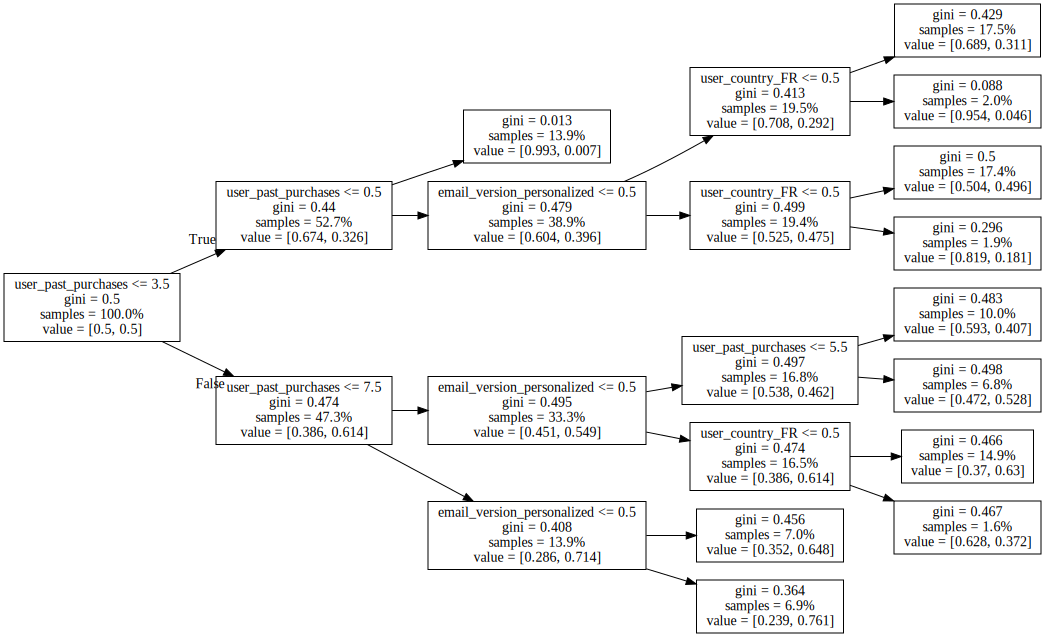

In [ ]:
data = pandas.read_csv('https://drive.google.com/uc?export=download&id=1PXjbqSMu__d_ppEv92i_Gnx3kKgfvhFk') 
data_dummy = pandas.get_dummies(data, drop_first=True) 
train_cols = data_dummy.drop('clicked', axis=1)
#build the tree

tree=DecisionTreeClassifier(
    #set max tree dept at 4. Bigger than that it just becomes too messy 
    max_depth=4,
    #change weights given that we have unbalanced classes. Our data set is now perfectly balanced. It makes easier to look at tree output 
    class_weight="balanced", #only split if it's worthwhile. The default value of 0 means always split no matter what if you can increase overall performance, which might lead to irrelevant splits 
    min_impurity_decrease = 0.001 ) 
tree.fit(train_cols,data_dummy['clicked']) #visualize it 
export_graphviz(tree, out_file="tree.dot", feature_names=train_cols.columns, proportion=True, rotate=True) 
with open("tree.dot") as f:
  dot_graph = f.read()
s = Source.from_file("tree.dot") 


The way to interpret the output is:

•	Each block is a tree node. The nodes all the way to the right are called leaves and the final model classification depends on the leaf where an event ends up

•	Within a node you have 4 values:

- The split. This is the split that leads to the two nodes to the right
- The gini index of that node. It represents purity of the node. 0.5 means random guess, so it is the worst possible value. 0 means perfect classification, so it is the best possible value. Look for nodes with values as close as possible to 0
- Samples: the proportion of events in that node. The higher the better. It means that node is very important cause captures many people
- Value: proportion of class 0 and class 1 events. The sum of those two values is always 1. Similarly to Gini, it gives an idea of how pure the node is. Ideally, you want one of the two values to be close to 1 and the other to be close to 0. That’s when Gini will be small. If the first of those two values is higher than 0.5, the node is labeled as class 0. Otherwise it is class 1 node

•	So our starting point is the first node to the left. There we have 100% of samples (obviously, we haven’t even started splitting), the proportion between classes is a perfect 50/50 (we balanced the data before building the model), and, therefore, the gini is 0.5, as bad as it can possibly be. From this node, the first split is on user_past_purchases <= 3.5. The way you read that is:
- If a user has <= 3.5 purchases, follow the True arrow. So you end up in the node up and right. That node has Gini of 0.44 (so we improved), 52.7% events (meaning 52.7% of people in our dataset have <= 3.5 purchases), and of those 52.7% of people 67.4% did not click while 32.6% did click. So this is a 0 class node. That split helped us identify a segment with a lower proportion of clicks compared to the starting point of 50/50.
- If you go right and down, you are following the False arrow. So you end up in a node representing people with > 3.5 purchases (i.e. not true that they have <= 3.5 purchases). In this case Gini is 0.474, samples is 47.3% and class 0/class 1 proportions are, respectively, 38.6% and 61.4%. So here we found a segment with a significantly higher percentage of people who click

•	Let’s now move one more step to the right. Let’s consider the node up/right, the one with 0.44, 52.7% and .674/.326 values inside. This is the starting point for the new split, which is user_past_purchases <= 0.5.
- As before, up means true, down means false. So if we go up, we find users who have <= 3.5 purchases AND <= 0.5 purchases. Since I am splitting on the same variable twice, this is the same as simply saying <= 0.5 purchases. We only have 13.9% of total users there and only 0.7% of them click! This is a really interesting node because it is so pure. Almost achieves perfect classification, as you can see from the super low gini.
- If we go down, we find users who have <= 3.5 purchases AND > 0.5 purchases. Basically, between 1 and 3 purchases. We have 38.9% of total users there and almost 40% of them click. The percentage of users who click is higher than the previous node. This means that by removing users with 0 purchases, we managed to find a better segment for our label

•	As you keep going right this way, you get to the leaves, which are the final classification of the tree. For instance, let’s take the leaf all the way up/right. Those are users with:
- <= 3.5 purchases AND
- More than 0.5 purchases (i.e. false that they have <= 0.5 purchases) AND
- Email_version_personalized <= 0.5 (meaning email is not personalized) AND
- User_country_France <= 0.5 (meaning the user is not from France)
These users represent 17.5% of total users. Out of those users, 68.9% don’t click and the remaining 31.1% click. So this is a class 0 leaf. If an event ends up there, we predict that will not click.


#Product Insights

•	By far the most important insight from a tree is given by the first split. This model is telling us that the most important segment is whether users bought more or less than 3 times in the past. Increasing the proportion of users with more than 3 purchases would be a great company-wide yearly goal.
We don’t have timestamp of the purchases here, but if we had that we could see if the tree also splits on that and create a metric like: percentage of users with at least 3 purchases within X time

•	If a user has zero purchases, the tree doesn’t split on any other variable. That’s a leaf. This means that everything else becomes irrelevant if a user has never bought. Changing time of the day, weekday, subject, etc, makes no difference there. To make these users click the change will need to be much more dramatic than just changing the email template or when to send it.
The next step should be crafting a totally different email with a different message just for these users. These are the hard users to win, but they are also where more value is. They already came to the site and gave their email address, so they have some sort of intent. But they never bought anything. Understanding why that happened could unlock so much value and is way easier to get these people to buy vs having to get new users and then trying to make them convert

•	Country UK/US and email_personalized = TRUE always lead to higher proportion of clicks, in both R and Python. R also splits on weekday with a clear weekend/weekday split, i.e. one side is Friday/Saturday/Sunday and the other side is the other days. Note that R can split on multiple levels at the same time, while Python will look at each dummy variable independently. In practical terms, this means that Python will need larger trees to extract that information. I.e. to split on those 3 days would require to go down 3 times, firstly splitting on say Friday, then Saturday, and then Sunday.
Also, a split on multiple levels has more power than a split on just one level, i.e. can separate the classes better. So always expect categorical variables with many levels to look more important in R than Python

•	There is no split on any other variables beside those above. This depends on the fact that we built rather small trees, so the tree only focused on macro-information. Beside the fact that is really hard to visualize large trees, splits in large trees are not that informative either.
If I had a split at the bottom on the variable hour, this would be conditional on all the previous splits, like purchases < X AND email_personalized = Y AND purchases > Z AND country = J, etc. So it wouldn’t tell me in absolute terms when it is the best time to send an email, but only for that specific segment. And given how specific that segment would be, there would be few events in that node, so overall it would not be particularly important



#Pros and Cons

#Pros of using decision trees to extract insights from data


✓ They are great to define hard thresholds and create metrics, i.e. power users, engaged users, etc.


✓ They are really good to prioritize projects. The tree structure from top to bottom makes easy to understand what matters and what doesn’t. Like in this case, a crucial insight is that we need to solve the 0 purchase -> no clicks problem. Slightly tweaking the email has no effect on them anyway, as shown by the fact that the 0 purchase segment has no split on any other variables

✓ They are easy to understand and very realistic, making it easy to explain the findings -> this segment represents X% of the population and they are Y times more likely to click. If we send personalized emails to these people, we can expect an increase in click rate of Z%. There is hardly a better message that can be told to product managers

✓ Because of the point above, they can be used to give an idea of how more complex techniques work. You can build a random forest or boosted trees, but then show product managers a single small tree to give an idea of the most important splits in that model. This won’t be 100% accurate, but it is a good way to explain complex models





#Cons of using decision trees to extract insights from data


✓ Except for the first split, all other splits are conditional to the prior splits. For instance, in those trees we built, no split would tell us the overall impact of making all emails personalized. It is only telling us the effect for specific segments given by the splits prior to that node. This is often a disadvantage from a practical standpoint. To decide if you want to work on something, you often want to know what would be the overall impact. Regressions or partial plots tell you by how much you can expect click rate to change if all emails were personalized. Trees are telling you: if you consider people whose variable X is less than Y AND variable Z = A etc., and if you make emails personalized for these people, you can expect a gain of X%. More often than not, this leads to underestimating the positive impact of certain changes


✓ Large trees are extremely confusing and barely usable for insights. Small trees are good in picking up macro-information, but not insights that might lead to small improvements. However, small improvements can be extremely useful too if they identify something that can be fixed quickly, like changing weekday/time of the emails. Other approaches give you a comprehensive view of all the variables, so a data scientist can think about the estimated gain vs the effort to fix that problem. Small trees just don’t show anything beside the first few splits. You could remove the most important variables of your tree and rebuild it on the other variables. That would help uncover small gain opportunities, but it would be manual (and boring) and overall not particularly efficient

✓ Creating segments has many advantages:
(1) it is great for metrics
(2) it is great to explain to product people
(3) it is great for continuous variables with clear segments that behave in a different ways (obviously)
However, trees create segment no matter what. Even if the relationship between a variable and the output is linear, a tree will find segments, which might not be ideal in certain cases

✓ Insights from the model are meaningful only if the model predicts well. If the model predicts badly, they are useless. And a single tree is not particularly good from a prediction standpoint. Specifically, small trees will tend to underfit and large trees will overfit















#Partial Dependence Plots - Theory


- Partial dependence plots (PDP) are the most effective way to extract information from a model. Although they work with all kinds of models, they are most commonly applied to black-box models. Matter of fact, the most common workflow of a data science project whose goal is to extract insights is to build a black-box model to maximize model predictive power (this typically means random forest or boosting decision trees) and then build the model PDP to extract insights.

- A few libraries in R and Python implement PDP. However, ironically, their meaning is often not 100% clear because they are themselves implemented as a black-box! That is, run this command and get the plots, with little-to-no explanation about how the plots are actually generated or the meaning of the axis values. The goal of this section is to exactly understand what they represent and why they are so useful.

- PDP are relatively simple to build, although it can be computationally very expensive. Essentially, if we want to build the PDP of a given variable X, we:

1.	Build any model and save it

2.	Create a vector with the unique values of variable X in your training set, i.e. [x1,x2, …, xn]

3.	Replace variable X in your entire dataset with the fixed value x1x1

4.	Feed this new dataset (which is the same as the original training set except for the fact that variable X value is always x1x1) into your model, get a prediction for all the events, and take the average

5.	Now you have one data point in the plot. x1x1 is the x-axis value and point 4) average is the y-axis value

6.	Repeat this for all unique values of X and you have your plot

Note that this can be done for a single variable or combinations of variables. For instance, you can take unique combinations of variables X and Z together and do the same steps as above. And now you have a 3-d plot (X, Z, and outcome average).

Below we will build our own PDP and we will see how to extract insights from them. We will use here the same email dataset described in the intro of this section.


PDP output example from built-in libraries

In [ ]:
#!pip install pdpbox
import pandas 
import numpy as np 
from pdpbox import pdp, info_plots 
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt 
pandas.set_option('display.max_columns', 10) 
pandas.set_option('display.width', 350) 
np.random.seed(4684) 

In [ ]:
data = pandas.get_dummies(data, drop_first=True) 
train_cols = data.drop('clicked', axis=1) 


Build the model. Here we just care about showing how to extract insights. Optimizing the model is beyond the scope of this section. Only thing we do beside default options is 
- (a) increasing the weight of minority class via class_weight to make sure the trees split on something and
- (b) increase the number of trees

In [ ]:
rf = RandomForestClassifier(class_weight={0:0.05,1:0.95}, n_estimators=50) 
rf.fit(train_cols, data['clicked'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.05, 1: 0.95}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

Let's build the PDP for the variable email_version. It is going to be fast since it has just two unique values. But the entire procedure would be exactly the same for any other categorical or numerical variable, would just be more computationally expensive 

In [ ]:
pdp_version = pdp.pdp_isolate( model=rf, dataset=train_cols, model_features=list(train_cols), feature='email_version_personalized') 
print(pdp_version.pdp)

[0.01414867 0.02592596]


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


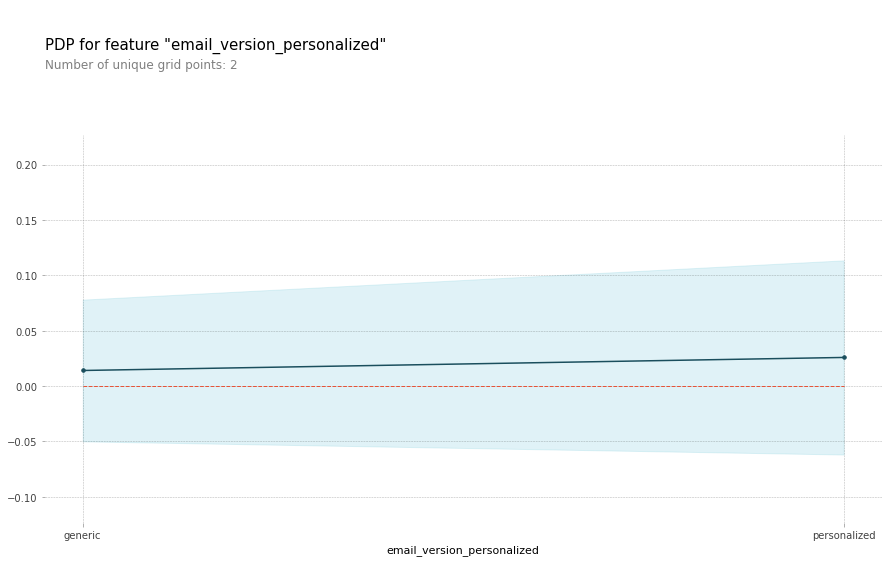

In [ ]:
fig, axes = pdp.pdp_plot(pdp_version, 'email_version_personalized', center=False) 
axes['pdp_ax'].set_xticklabels(['generic', 'personalized'])
plt.show()

#PdP Comments

The results appear pretty similar to the logistic regression conclusions, with the personalized version of the email being clearly better. 

It is important to note here that the classes of this dataset are highly imbalanced as always with conversion rate or clicks. So it is expected that pretty much all segments have negative (if plotting logits) or close-to-zero (if plotting probabilities) values. What matters is to find segments that have relatively higher values. After all, if your site conversion rate is 2% and you find a segment with 4% conversion rate, you are still well below 50%, but you have found a segment that generates 2X as much money per user. The business impact would be huge.

#Build your own PDP

The best way to learn something is to code it from scratch. So let’s do it and build our own pdp for email version.


In [ ]:
#Code from scratch pdp for email version
  
#Create empty data frame where I store all predictions. Each column will be a prediction for a given event (so we have 99950 of them) and each row a unique element of email_version (so 2)
pred_df = pandas.DataFrame(index=range(data['email_version_personalized'].nunique()), columns=range(data.shape[0]))
  
#Start a for loop for each unique value of email_version_personalized. Just two here
for i in range(data['email_version_personalized'].nunique()):
    #replace in the training set all values of email version with a fixed one
    tmp = data.assign(email_version_personalized = i) #temp data set for the new values
    #get the predictions as probabilities 
    predictions = rf.predict_proba(tmp.drop('clicked', axis=1))
  #pred_df is our datasets with the partial predictions for each event. Each column is one of the events that were computed via predict_proba. The first row is the prediction when we fixed the value of email_version as generic for that event. The second row is the prediction for the the same event after changing the value of email_version to personalized  
    pred_df.iloc[[i], :]=[x[1] for x in predictions]
  
##Let's now average those values to get the plots. Intuitively, that makes sense. The only difference we see in those predictions is given by the fact that we change the value of email version. And the average is a way to understand the overall impact across all data
pdp_values = pred_df.mean(axis=1)
#prettier indices
pdp_values.rename(index={0:'generic', 1:'personalized'},inplace=True)
  
#Finally let's compare our results with pdpbox values, which are the ones in the plot above
output_table = pandas.DataFrame(dict(own_pdp = pdp_values, python_pdp_library = pdp_version.pdp))

print(output_table)
  
#They perfectly match! Now you know how pdp are calculated!
               own_pdp  python_pdp_library
generic       0.014096            0.014096
personalized  0.026154            0.026154




Now that’s clear what are partial dependence plots, in the next section we will use them to extract insights from this data set.

#Partial Dependence Plots - Practice
Let’s now use pdp to extract insights. We will firstly build a RF and then apply pdp to it. However, as it should be clear from the previous section, you can apply pdp to any models you want.

#This section is particularly important because the steps you will find below are the most common way to extract insights from data in the corporate world.


     |████████████████████████████████| 34.0MB 110kB/s 
     |████████████████████████████████| 13.1MB 324kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35758227 sha256=33d41e3360e7893583db06b8a40d0168d8406350a92c6a89567fc9815eaa3ae5
  Stored in directory: /root/.cache/pip/wheels/c8/13/11/ecac74c6192790c94f6f5d919f1a388f927b9febb690e45eef
Successfully built pdpbox
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


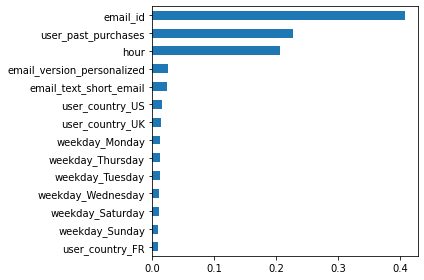

In [ ]:
#Same steps as in the previous section to get the dataset ready
!pip install pdpbox
import pandas 
import numpy as np
from pdpbox import pdp, info_plots
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib import rcParams
pandas.set_option('display.max_columns', 10)
rcParams.update({'figure.autolayout': True})
  
np.random.seed(4684)
data = pandas.read_csv('https://drive.google.com/uc?export=download&id=1PXjbqSMu__d_ppEv92i_Gnx3kKgfvhFk')
  
#prepare the data for the model
data_dummy = pandas.get_dummies(data, drop_first=True)
train_cols = data_dummy.drop('clicked', axis=1)
  
#build the model. Again, here we just care about showing how to extract insights. 
#Optimizing the model is beyond the scope of this section. 
#Only thing we do beside default options is increasing the weight of minority class via classwt to make sure the trees split on something and choose 50 as tree number
rf = RandomForestClassifier(class_weight={0:0.05,1:0.95}, n_estimators=50)
rf.fit(train_cols, data_dummy['clicked'])
  
#estimate variable importance
feat_importances = pandas.Series(rf.feature_importances_, index=train_cols.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh')
plt.show()


Python returns variable importance for each dummy variable separately, not for the original categorical variable before creating the dummy variables.

Based on this, we see that the relevant variables are email _id, user_past_purchases, and hour. It is not by chance that the top 3 variables are the numerical ones. In general, obviously, the overall impact of a categorical variable gets penalized here since we are looking at each dummy variable independently. For a similar reason, the dummy variables from categorical variables with less levels, like email_version or email_text, show up as more important (its overall importance is split into less dummy variables).

Regardless of the actual accuracy of this specific variable importance technique (which is very little), what is much more important is that a plot like this one is not really that informative. Few product managers will care about a statement like: “the time of the day in which we send the email is important!”. What they want to know is when is the best time, and variable importance gives no info about it.


In [ ]:
plot_variable

['email_id']

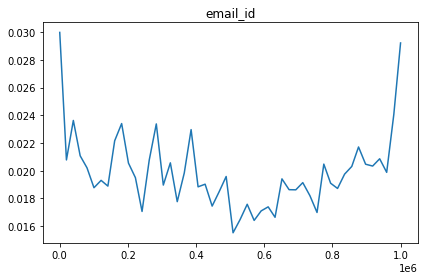

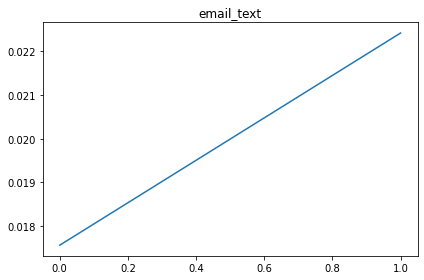

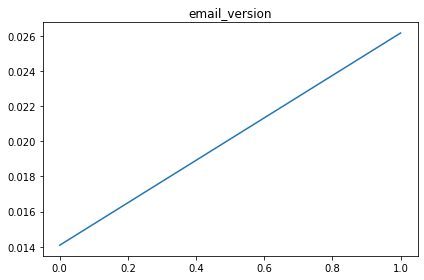

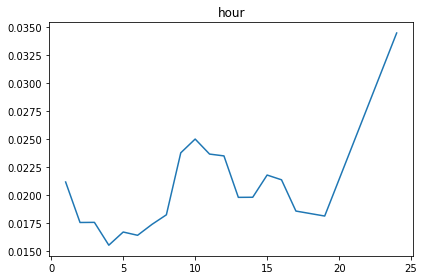

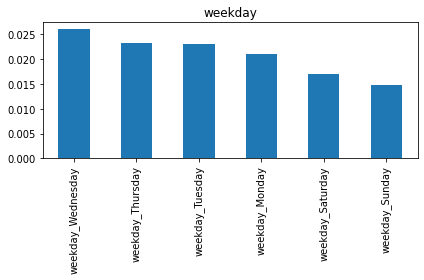

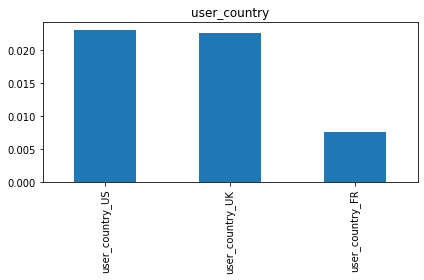

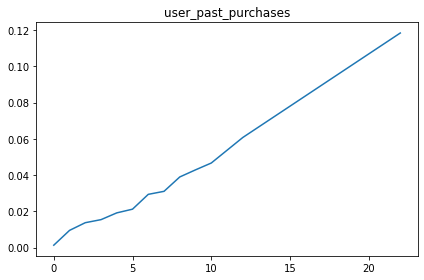

In [ ]:
#PDP Analysis
#Let's plot all of them. Note that pdpbox allows to group together dummy variables coming from the same categorical variable. For this we need to get the original variable names.
feat_original = data.columns.drop('clicked') #plot all variables with a for loop. If a variable is categorical make sure to plot all levels together. 
#get all variables that include the name in feat_original. So, if it is numeric, just take that variable. If it is categorical, take all dummies belonging to the same categorical variable. Since for dummies their name is variable_level, this is easy. Just pick all variables that start with the original variable name. I.e. to get all weekday dummies (weekday_Monday, weekday_Tuesday, etc.), we just look for all variables starting with "weekday" #variables to plot 

for i in range(len(feat_original)):
  plot_variable = [e for e in list(train_cols) if e.startswith(feat_original[i])] #numeric variables or dummy with just 1 level 
  if len(plot_variable) == 1: 
    pdp_iso = pdp.pdp_isolate( model=rf, dataset=train_cols, model_features=list(train_cols), feature=plot_variable[0], num_grid_points=50) 
    pdp_dataset = pandas.Series(pdp_iso.pdp, index=pdp_iso.feature_grids) #pdpbox has several options if you want to use their built-in plots. I personally prefer just using .plot. It is totally subjective obviously. 
    pdp_dataset.plot(title=feat_original[i])
    plt.show() #categorical variables with several levels else:
  else: 
    pdp_iso = pdp.pdp_isolate(model=rf, dataset=train_cols, model_features=list(train_cols), feature=plot_variable, num_grid_points=50) 
    pdp_dataset = pandas.Series(pdp_iso.pdp, index=pdp_iso.display_columns) 
    pdp_dataset.sort_values(ascending=False).plot(kind='bar', title=feat_original[i]) 
    plt.show() 
    plt.close()


In [ ]:
plot_variable

['user_past_purchases']

#Understanding the output

•	Firstly, look at the y-axis scale. The larger that scale, the more important is that variable. It’s essentially telling us by how much changing that variable value would impact the output. And our goal is finding where the change is the largest. That’s where the money is

•	The number of past purchases made by the user appears then by far the most important variable. The more purchases they have made, the larger the probability they will click on the email. This is kind of obvious, but a perfect example of a crucial concept: there is no such thing as marketing and product as independent initiatives. A better product leads to better marketing and the other way round. If product figures out how to increase conversion rate, marketing metrics will go up too! Embedding someone from marketing within product, or at least having visibility into what product is doing, will be very beneficial for the marketing team

•	Email_id appears pretty important, with a very clear trend: first and last email_ids are the best ones. The emails in the middle are the worst. Obviously, this cannot be the ID itself, but it is more like this variable is a proxy for something else. The most realistic explanation is that first emails (low email IDs) are correlated with early users. And high IDs are a proxy for someone who just created the account. And these two segments are the best ones for clicks. If this were the reason, a very interesting thing to note is: shortly after people create the account, email them, that’s when they have your company in mind and are likely to positively react to the email. Conversely, if you let them forget about you, it will be very hard to win them back (unless they are the very early and passionate users)

•	Hour is super interesting. There is a clear best segment in the morning, something like 9 to noon. That’s when they should receive the email. There is a spike around midnight, but that’s probably just noise. See that in the R plots along the x-axis there are some ticks. Those are deciles and show that between 15 and 24 it is only 10% of all users in my training set, so that spike is likely just noise. When you look at continuous variables, make sure to consider how many users are actually within given segments, cause huge spikes or drops could be noise (especially towards the end or beginning of the plot)

•	Weekday shows a clear pattern in terms of weekends vs weekdays (the other days). Weekends are much worse. Combining this with the hour plot, it looks like sending emails on mornings during weekdays could improve clicks a lot

•	UK and US are much better. Having someone from the international team look at those versions of the emails in French and Spanish is likely to help us discover what’s wrong here. In any case, comparable countries like can be UK and France should not have such a large difference. It does look like something went wrong with the translation or something similar

•	Not surprisingly, short and personalized emails do better. Note, however, how the gain from personalization vs generic is much larger than short vs long. If just adding the name can lead to that gain, imagine real personalization. While all other insights are more about quick fixes, this is the kind of insight that can lead to a fully new project

#Pros and Cons

#Pros of using Partial Dependence Plots to extract insights from data


✓ Pdp are the most reliable way to extract insights from data. They allow to:

1) Quickly and accurately visualize variable importance (via the y-axis scale). Indeed, variable importance via permutation is based on the same idea as partial plots

2) See in depth how each variable affects the output

3) They can lead to a pretty accurate opportunity-cost analysis to prioritize projects. After all, you can see right away the estimated impact on the output if changing a given variable




#Cons of using Partial Dependence Plots to extract insights from data


✓ At their core, pdp are just a way to easily visualize the model structure. If the model is bad, pdp are bad. Whatever weakness the model has, pdp have it too. Always take this into account before jumping to conclusions. For instance, if you build pdp for logistic regressions you will get a monotonic relationship between variable and output, because that’s how logistic regressions work


✓ For numerical variables, you might see big spikes or drops simply given by noise. Having percentiles as ticks on the x-axis will help you with that. In general, take into account the size of each segment before jumping to conclusions

✓ Not all product managers are familiar with pdp. So you will need to explain in a simple way what they are looking at. Instinctively, people will think they are looking at simple plots of that variable vs the label. You will have to make clear that they are, in fact, looking at the way the model is extracting information from that variable

#Rulefit - Theory


As we have seen, regressions have many pros, but two pretty important disadvantages:

1.	They imply a linear relationship between outcome and variables. Most specifically, the relationship has to be monotonic, meaning that as the variable value increases the output always keeps increasing or decreasing. But that’s hardly realistic, as we have seen for the hour variable in our dataset, or think about age, or really the majority of continuous variables

2.	They look at each variable independently. So, in our case, hour and weekday are treated separately. But it is likely that the two are related. Morning might be a good time during weekdays, but it is probably a bad time during weekends. In short, they don’t take into account variable interactions


On the other hand, trees are very good in those two points above, but suffer from many other issues as we extensively discussed in the previous section. The idea behind RuleFit is therefore to somehow combine regressions and decision trees in such a way that you can minimize the disadvantages of each model and maximize the pros. Specifically, the idea is:

1.	Build any kinds of tree-based classifiers. Let’s say a RF, for simplicity

2.	Extract rules from the trees. Rules means all splits that lead to a leaf. So the first rule would be based on just one variable, because it is the top split. Like in the previous examples was something like: Purchases<3.5. The second rule would be the path to the node below that one. So something like: Purchases<3.5 AND Purchases < 0.5 and so on for all nodes in the trees

3.	Turn these rules into dummy variables. So for instance add to your dataset a column called purchases_less_3.5 and assign value 1 if it is true for that particular row and 0 if it is false. Do this for all the rules

4.	Build a logistic regression on this new dataset which will include all the original variables + the rule-based variables
Rulefit - Core Idea
Before actually building a full Rulefit model, let’s just take its core idea and use it for one variable to understand how it works. The example below is an oversimplification, but, hopefully, it makes clear how the model works conceptually.
We know that if we build a logistic regression, we get the output below for the variable hour. This is telling us that as we increase hour, we have higher probability of clicks. So the best time is 24!


In [ ]:
import pandas
import statsmodels.api as sm
pandas.set_option('display.max_columns', 10)
pandas.set_option('display.width', 350)
#read from google drive
data = pandas.read_csv('https://drive.google.com/uc?export=download&id=1PXjbqSMu__d_ppEv92i_Gnx3kKgfvhFk')
# make dummy variables from categorical ones. Using one-hot encoding and drop_first=True 
data = pandas.get_dummies(data, drop_first=True)
#add intercept
data['intercept'] = 1
#drop the label
train_cols = data.drop('clicked', axis=1)
#Build LR
logit = sm.Logit(data['clicked'], train_cols)
output = logit.fit()
output_table = pandas.DataFrame(dict(coefficients = output.params, SE = output.bse, z = output.tvalues, p_values = output.pvalues))
print(output_table.iloc[[1,14]])


Optimization terminated successfully.
         Current function value: 0.092770
         Iterations 9
           coefficients        SE          z  p_values
hour           0.016707  0.005006   3.337445  0.000846
intercept     -6.880922  0.156067 -44.089646  0.000000


However, if we plot hour against click rate, we see a different scenario (and we saw the same with the partial plots):

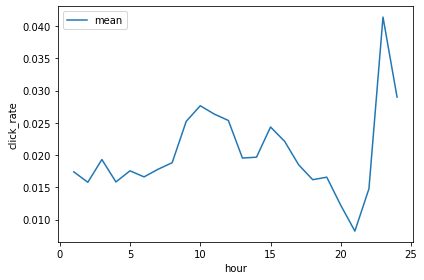

In [ ]:
import pandas
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
#group by hour and estimate click rate and total count of emails sent per hour
data_hour = data.groupby('hour')['clicked'].agg(['count', 'mean']).reset_index()
data_hour.plot(x='hour', y='mean')
plt.ylabel("click_rate")
plt.show()


In [ ]:
# That spike at the end of the plot is just noise. We can see that we have few emails sent in the night anyway.
print(data_hour)

In any case, the relationship between hour and the outcome is certainly non-monotonic. Early morning is down, middle of the day is up, evening is down again, then the noisy spike at the end. So, let’s try to make life easier for the logistic regression by creating a new variable based on a simple rule: IF hour > 6 AND hour < 18 -> 1 ELSE -> 0. After all, it should be much easier to pick information from that clean up/down segment, we saw that logistic regression excels at this.

In [ ]:
#add new rule-based variable
data['middle_day'] = np.where((data['hour']<18)&(data['hour']>6), 1, 0)
# rebuild the regression
data = pandas.get_dummies(data, drop_first=True)
data['intercept'] = 1
train_cols = data.drop('clicked', axis=1)
logit = sm.Logit(data['clicked'], train_cols)
output = logit.fit()
output_table = pandas.DataFrame(dict(coefficients = output.params, SE = output.bse, z = output.tvalues, p_values = output.pvalues))
#reorder the output
print(output_table.iloc[[15,1, 14]].append(output_table.drop(output_table.index[[15,1, 14]])))


Optimization terminated successfully.
         Current function value: 0.092636
         Iterations 9
                            coefficients            SE          z       p_values
intercept                  -6.937734e+00  1.573351e-01 -44.095274   0.000000e+00
hour                        5.312621e-04  6.250677e-03   0.084993   9.322672e-01
user_country_US             1.142917e+00  1.159867e-01   9.853859   6.596158e-23
email_id                   -4.007616e-08  7.782442e-08  -0.514956   6.065838e-01
user_past_purchases         1.878623e-01  5.730251e-03  32.784308  9.854981e-236
middle_day                  2.982799e-01  5.902513e-02   5.053439   4.339247e-07
email_text_short_email      2.784118e-01  4.531495e-02   6.143928   8.050532e-10
email_version_personalized  6.381222e-01  4.692389e-02  13.599090   4.054487e-42
weekday_Monday              5.409127e-01  9.342941e-02   5.789533   7.058238e-09
weekday_Saturday            2.835385e-01  9.779542e-02   2.899302   3.739941e-03
weekday

- There you go! Very interesting! Middle day is highly significant, and its coefficient now makes perfect sense: if it is middle of the day, probability of clicks goes up. Being more sound: if it is middle of the day, defined as from 7AM to 5PM, the log-odds increase by ~0.3. And now hour is not significant anymore since all information has already been extracted from middle_day.

- This is the key idea of Rulefit: create variables based on segments given by one or more variables and add them to the regression. And turns out that trees are already creating those segments in the most optimal way. So why don’t just use those splits to create the rules?

- Now that the core idea behind Rulefit should be clear, in the next section we will see how to actually build and extract information from a Rulefit model.


#Rulefit - Practice


From the previous section it should be clear that Rulefit is particularly powerful if the goal is to extract insights, given that it kind of combines the best of both worlds: regressions and trees. However, it should also be clear how is extremely computationally expensive. After all, in order to build Rulefit you need to go through the following steps:

1.	Build a forest of trees

2.	Extract tons of rules from it

3.	Use those rules to create new dummy variables and add those variables to the original dataset

4.	Build a regression on a now huge dataset, after all its dimensionality has increased tremendously

To make things even worse, those 4 steps have to be performed in sequence, meaning you can’t parallelize them!
Processing time is not particularly relevant for insights and non-production data science in general, at least if we talk about saving seconds or minutes. However, it is relevant if we are talking about hours. After all, it is hard to optimize a model if it takes too long to build it. And, as we know, bad models lead to bad insights.
Btw, try to keep the forest of trees as small as possible since its size impacts all 4 point processing time.


In [ ]:

#install Rulefit from github 
!pip3 install git+https://github.com/christophM/rulefit.git
import pandas as pandas
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d
from sklearn.linear_model import LogisticRegression
from rulefit import RuleFit
  
pandas.set_option('display.max_columns', 10)
pandas.set_option('display.width', 350)
np.random.seed(4684)
  
#read from google drive
data = pandas.read_csv('https://drive.google.com/uc?export=download&id=1PXjbqSMu__d_ppEv92i_Gnx3kKgfvhFk')
# make dummy variables from categorical ones. Using one-hot encoding and drop_first=True 
data = pandas.get_dummies(data, drop_first=True)
#drop the label
train_cols = data.drop('clicked', axis=1)
  
#Extract rules from Random Forest
#set tree forest parameters
rf=RandomForestClassifier(max_depth=2, n_estimators=10, class_weight={0:0.05,1:0.95})
  
#set RuleFit parameters. We are keeping RuleFit pretty small here to make it faster. Increasing max_depth, n_estimators, and setting exp_rand_tree_size = True will generate way more rules and make it somewhat more reliable. As always, there is a trade-off between accuracy and processing time, which should be considered on a case-by-case basis. Note that RuleFit is really slow, so this trade-off is pretty significant here.     
rufi=RuleFit(rfmode="classify", tree_generator=rf, exp_rand_tree_size=False, lin_standardise=False)
#fit RuleFit
rufi.fit(train_cols.values, data['clicked'].values, feature_names = train_cols.columns)
print("We have extracted", rufi.transform(train_cols.values).shape[1], "rules")

#These are a few of the rules we have extracted
output=rufi.get_rules()
print(output[output['type']=="rule"]['rule'].head().values)
['user_past_purchases > 3.5 & weekday_Wednesday > 0.5'
 'weekday_Tuesday > 0.5 & user_country_FR > 0.5'
 'weekday_Tuesday <= 0.5 & weekday_Wednesday <= 0.5'
 'email_text_short_email <= 0.5 & user_past_purchases <= 5.5'
 'user_past_purchases <= 3.5 & email_version_personalized <= 0.5']
#X_concat is the new dataset given by the original variables (train_cols.values)
#as well as the new rules extracted from the trees (rufi.transform(train_cols.values))
X_concat = np.concatenate((train_cols, rufi.transform(train_cols.values)), axis=1)
#Build the logistic regression with penalty. This will set low coefficients to zero, so only the relevant ones will survive
log = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
log.fit(X_concat, data['clicked'])
#get the full output with variables, coefficients, and support
output.iloc[:,2] = np.transpose(log.coef_)
output[output['coef']!=0].sort_values('coef', ascending = False )



  Cloning https://github.com/christophM/rulefit.git to /tmp/pip-req-build-myhb2wgc
  Running command git clone -q https://github.com/christophM/rulefit.git /tmp/pip-req-build-myhb2wgc
  Created wheel for RuleFit: filename=RuleFit-0.3-cp37-none-any.whl size=8789 sha256=b68846c703bd1cb539b67c365654499eb836f94a2df5bbcdddb064b17d2f54e6
  Stored in directory: /tmp/pip-ephem-wheel-cache-5allqqn1/wheels/c8/f1/65/49a8b77c1b417067e78457e71778d8eb84c9f90010e6458a0d
Successfully built RuleFit
We have extracted 38 rules
['weekday_Tuesday > 0.5 & user_country_FR > 0.5'
 'user_country_FR <= 0.5 & weekday_Sunday <= 0.5'
 'weekday_Wednesday <= 0.5 & user_country_FR > 0.5'
 'email_version_personalized > 0.5 & email_text_short_email > 0.5'
 'user_past_purchases <= 4.5 & user_past_purchases <= 0.5']


,rule,type,coef,support,importance
12,user_country_UK,linear,9.004964e-01,1.000000,0.000000
8,weekday_Thursday,linear,3.975176e-01,1.000000,0.000000
5,weekday_Monday,linear,3.197701e-01,1.000000,0.000000
2,user_past_purchases,linear,1.421194e-01,1.000000,0.000000
17,email_version_personalized > 0.5 & email_text_...,rule,1.291703e-01,0.248180,0.000000
35,email_version_personalized > 0.5 & user_countr...,rule,1.094075e-01,0.299551,0.000000
23,weekday_Tuesday <= 0.5 & email_text_short_emai...,rule,5.837601e-02,0.427504,0.000000
6,weekday_Saturday,linear,5.060555e-02,1.000000,0.000000
21,user_past_purchases > 3.5 & weekday_Wednesday ...,rule,1.960095e-02,0.066040,0.000000
0,email_id,linear,-6.663682e-08,1.000000,1.337860


This means:

•	Column rule: this is the regression variable name. If it is one of the original variables, it is simply its name, like in the case of email_id, hour, etc. If it is a new dummy variable created by the trees, it is the rule itself

•	Column type: linear means one of the original variables, rule means a new rule-based variable coming from the forest

•	Column Coefficient: it is the coefficient of that variable in the final regression. The logistic regression penalty forced the least important coefficients to be set to zero. What you see here are just the coefficients >0. Its meaning is the common meaning of the logistic regression coefficients, obviously. So positive sign means higher probability of clicks and negative the opposite. The higher the absolute value, the more impact on the log odds has a change in one unit of that variable

•	Column support: for linear features, it is just 1. For Rules, it represents the proportion of people for which that rule is true. For rules, the best supports are close to 0.5. That means that rule is good in separating events. Close to 0 or 1 supports are pretty useless, since that means that that rule is true/false for pretty much everyone. So, as a general rule, look for rules with high coefficient absolute value and support close to 0.5. A more statistically sound approach would be estimating the std deviation of the rule (which is higher when the support is close to 0.5 and smaller when it is close to 0 or 1) and multiplying it by the coefficient absolute value. The highest this number, the more important is the rule. That’s how R ranks RuleFit rules for instance



#Insights From Rulefit


Going through the rules and without repeating findings already largely discussed for the previous models (i.e. number of purchases is the most important thing, email generic is always bad, personalization and short are always good, etc.):

•	There is a nice email_version_personalized > 0.5 & email_text_short_email > 0.5 rule. We knew from before that personalization and short emails were good, if considered by themselves. But this is telling us something more: if you combine these two together is when you actually maximize the value. Note that this is not so obvious. There are many cases in which variables taken independently might be good for the outcome, but not when combined

•	The model splits on hour in several rules, the split always being early in the morning (either 8 or 9 AM). Note that rules including hour have a way larger coefficient than the original linear variable hour. This means that what really matters is the split early morning/rest of the day, that’s what affects the regression outcome. If you visualize this via partial dependence plots, then it will become even clearer

•	The largest coefficient by far is for the rule where user_past_purchases == 0 (literally user_past_purchases <= 4.5 & user_past_purchases <= 0.5). These people will probably need a totally different email strategy. Convincing someone to buy for the first time is totally different than convincing someone to buy again

•	There are several splits on weekday. If we combine them, we see that Thursday and Monday have a large positive coefficient. Also, in absolute value, the largest coefficient including weekday is for the rule: weekday_Wednesday <= 0.5 & weekday_Tuesday <= 0.5. Combining this information, we get to the conclusion that the best possible thing is sending it on Wednesday or Tuesday (not sending it on either day would lead to -0.45). Second best option is sending it on Thursday (would lead to +.39) and third best option is sending it on Monday (+0.31). All other days are significantly worse. So again, we should not send emails on weekends!



#Pros and Cons

##Pros of using RuleFit to extract insights from data


✓ RuleFit is essentially a logistic regression with feature engineering built on top of it via a forest of trees. Therefore, it really has the best of both worlds: it is easy to explain it, it can capture linear and non-linear relationships, and can be used when you need segmentation

✓ It is extremely flexible. You can define how to build the forest, you can define how to extract rules from it, and you can define how aggressively to remove rules via the logistic regression penalty. RuleFit is flexible enough that you can actually build the best possible model for your data and project goal



##Cons of using RuleFit to extract insights from data


✓ It is very computationally expensive. This is not just a computer science problem. It is very much an insight problem as well. Since it takes so long to build it, it becomes hard to optimize it. After all, you cannot spend weeks to try different parameters. This can lead to sub-optimal models and lower quality insights. This is even worse because its flexibility means that there are a lot of parameters that could be optimized

✓ Rulefit never quite became as popular as other models. It never went mainstream. In practical terms this means that, if you have any problems, stackoverflow won’t help you that much

✓ If you have many rules involving the same variable, might be hard to isolate the impact of that variable on the output. This problem can (and should) be solved by applying partial dependence plots (PDP) to RuleFit. PDP will isolate the impact of a given variable after considering all the rules together. Indeed, PDP are used a lot together with RuleFit.
